In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import nltk

In [2]:
df = pd.read_csv('reviews.csv')
df = df.head(500)

In [3]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


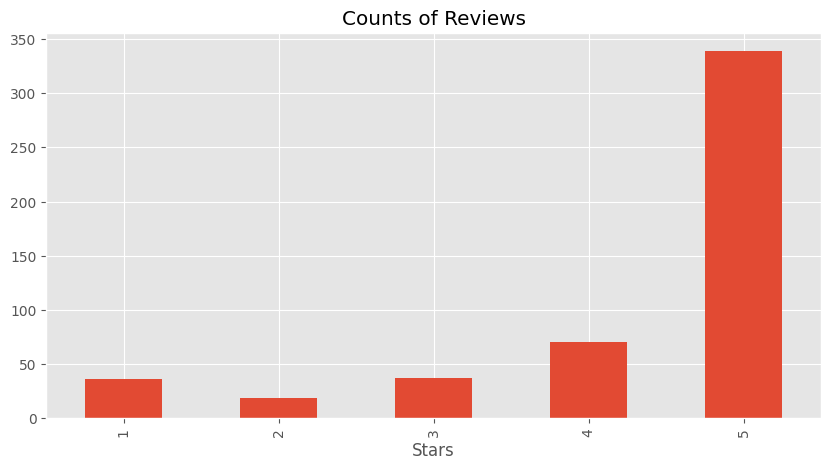

In [4]:
graph = df['Score'].value_counts().sort_index().plot(kind='bar', title = 'Counts of Reviews', figsize=(10, 5))
graph.set_xlabel("Stars")
plt.show()

In [5]:
 ex = df['Text'][50]
 print (ex)
 print (df['Score'][50])

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.
1


In [6]:
nltk.download('punkt')
import nltk
from nltk.tokenize import word_tokenize
tokens = nltk.word_tokenize(ex)

[nltk_data] Downloading package punkt to /Users/nihaarc/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [7]:
from nltk import pos_tag
nltk.download('tagsets')
nltk.download('averaged_perceptron_tagger')
from collections import Counter
from nltk.stem import WordNetLemmatizer
from nltk import FreqDist
from nltk.corpus import stopwords

tags = nltk.pos_tag(tokens)

[nltk_data] Downloading package tagsets to /Users/nihaarc/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/nihaarc/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [8]:
from nltk import ne_chunk
nltk.download('maxent_ne_chunker')
nltk.download('words')
entities = nltk.chunk.ne_chunk(tags)
entities.pprint()

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/nihaarc/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /Users/nihaarc/nltk_data...
[nltk_data]   Package words is already up-to-date!


(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


In [9]:
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/nihaarc/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [10]:
text = "This is an awesome product!"
print(sia.polarity_scores(text))

{'neg': 0.0, 'neu': 0.477, 'pos': 0.523, 'compound': 0.6588}


In [11]:
text = "I hate this product"
print(sia.polarity_scores(text))

{'neg': 0.649, 'neu': 0.351, 'pos': 0.0, 'compound': -0.5719}


In [12]:
print(sia.polarity_scores(ex))

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}


In [13]:
 scores = {}
 for i, row in tqdm(df.iterrows()):
    scores[row['Id']] = sia.polarity_scores(row['Text'])


0it [00:00, ?it/s]

In [14]:
scoresDF = pd.DataFrame(scores).T
scoresDF.head()
scoresDF = scoresDF.reset_index().rename(columns={'index' : 'Id'})
scoresDF = scoresDF.merge(df, how='left')


In [15]:
scoresDF.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


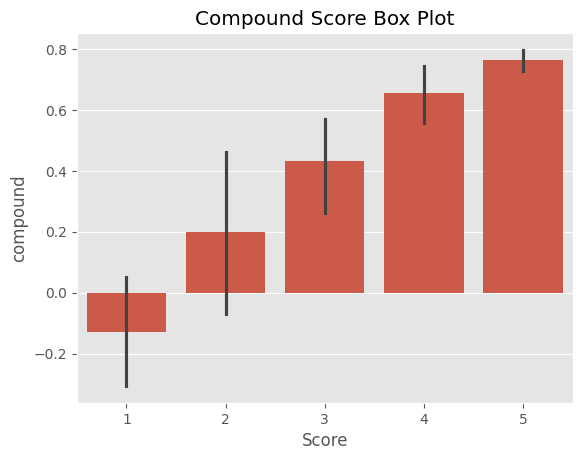

In [16]:
axis = sns.barplot(data=scoresDF, x = 'Score', y = 'compound')
axis.set_title('Compound Score Box Plot')
plt.show()

Text(0.5, 1.0, 'Positive')

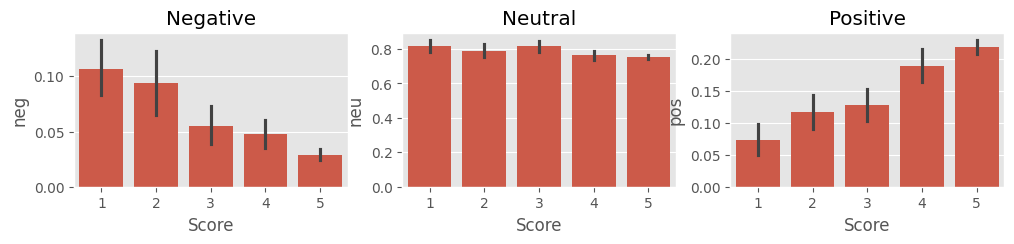

In [17]:
fig, axs = plt.subplots(1, 3, figsize=(12, 2))
sns.barplot(data=scoresDF, x = 'Score', y = 'neg', ax = axs[0])
sns.barplot(data=scoresDF, x = 'Score', y = 'neu', ax = axs[1])
sns.barplot(data=scoresDF, x = 'Score', y = 'pos', ax = axs[2])
axs[0].set_title('Negative')
axs[1].set_title('Neutral')
axs[2].set_title('Positive')

In [18]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax
import torch

/Users/nihaarc/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [19]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL, force_download=True)
model = AutoModelForSequenceClassification.from_pretrained(MODEL, force_download=True)


/Users/nihaarc/Library/Python/3.9/lib/python/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

/Users/nihaarc/Library/Python/3.9/lib/python/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [23]:
encoded = tokenizer(ex, return_tensors='pt')


In [24]:
out = model(**encoded)
out

SequenceClassifierOutput(loss=None, logits=tensor([[ 3.1436, -0.7107, -2.6559]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [29]:
scores = out[0][0].detach().numpy()
scores = softmax(scores)
dist = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(dist)

{'roberta_neg': 0.97635514, 'roberta_neu': 0.02068747, 'roberta_pos': 0.0029573736}


In [30]:
def robertaPolarity(ex):
    encoded = tokenizer(ex, return_tensors='pt')
    out = model(**encoded)
    scores = out[0][0].detach().numpy()
    scores = softmax(scores)
    dist = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return dist


In [40]:
 res = {}
 for i, row in tqdm(df.iterrows()):
    try: 
        vaderRes = sia.polarity_scores(row['Text'])
        newVaderRes = {}
        for key, val in vaderRes.items():
            newVaderRes[f"vader_{key}"] = val

        robertaRes = robertaPolarity(row['Text'])
        both = {**newVaderRes, **robertaRes}
        res[row["Id"]] = both
    except RuntimeError:
        print("Breaks")

0it [00:00, ?it/s]

Breaks
Breaks


In [42]:
res

{1: {'vader_neg': 0.0,
  'vader_neu': 0.695,
  'vader_pos': 0.305,
  'vader_compound': 0.9441,
  'roberta_neg': 0.009624209,
  'roberta_neu': 0.049980342,
  'roberta_pos': 0.9403955},
 2: {'vader_neg': 0.138,
  'vader_neu': 0.862,
  'vader_pos': 0.0,
  'vader_compound': -0.5664,
  'roberta_neg': 0.50898576,
  'roberta_neu': 0.45241377,
  'roberta_pos': 0.038600437},
 3: {'vader_neg': 0.091,
  'vader_neu': 0.754,
  'vader_pos': 0.155,
  'vader_compound': 0.8265,
  'roberta_neg': 0.003228903,
  'roberta_neu': 0.09806742,
  'roberta_pos': 0.8987037},
 4: {'vader_neg': 0.0,
  'vader_neu': 1.0,
  'vader_pos': 0.0,
  'vader_compound': 0.0,
  'roberta_neg': 0.0022951283,
  'roberta_neu': 0.090219304,
  'roberta_pos': 0.9074856},
 5: {'vader_neg': 0.0,
  'vader_neu': 0.552,
  'vader_pos': 0.448,
  'vader_compound': 0.9468,
  'roberta_neg': 0.0016347268,
  'roberta_neu': 0.0103024505,
  'roberta_pos': 0.98806286},
 6: {'vader_neg': 0.029,
  'vader_neu': 0.809,
  'vader_pos': 0.163,
  'vader_com

In [50]:
scoresDF = pd.DataFrame(res).T
scoresDF.head()
scoresDF = scoresDF.reset_index().rename(columns={'index' : 'Id'})
scoresDF = scoresDF.merge(df, how='left')

In [51]:
scoresDF.head()

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,0.009624,0.049980,0.940395,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,0.508986,0.452414,0.038600,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,0.003229,0.098067,0.898704,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,0.002295,0.090219,0.907486,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,0.001635,0.010302,0.988063,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [52]:
#plot the combined result

In [55]:
scoresDF.query('Score == 1').sort_values('roberta_pos', ascending=False)['Text'].values[0]

'I felt energized within five minutes, but it lasted for about 45 minutes. I paid $3.99 for this drink. I could have just drunk a cup of coffee and saved my money.'

In [56]:
scoresDF.query('Score == 1').sort_values('vader_pos', ascending=False)['Text'].values[0]

'So we cancelled the order.  It was cancelled without any problem.  That is a positive note...'

In [57]:
scoresDF.query('Score == 5').sort_values('roberta_neg', ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

In [59]:
scoresDF.query('Score == 5').sort_values('vader_neg', ascending=False)['Text'].values[1]

'What a deal this is the healthiest salt you can use.  This box should last our family the year no problem.  Iodized sea salt will not raise your blood pressure as regular salt will.'

In [60]:
from transformers import pipeline
sentPipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/Users/nihaarc/Library/Python/3.9/lib/python/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [65]:
sentPipeline(scoresDF['Text'][1])


[{'label': 'NEGATIVE', 'score': 0.9995254278182983}]